<a href="https://colab.research.google.com/github/Abubakerashfaq/Movie_Recommendation/blob/main/your_name_project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion_MNIST image recognition with *Convolution Neural Network*
In this project you must develop an evaluate a convolution neural network to recognize Fashion MNIST images: https://keras.io/api/datasets/fashion_mnist/

Dataset consists of $28\times 28$ grayscale images of department store items labeled with the image classes (0 through 9):
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9.Ankle boot



Make sure that you change *Runtime* to ***GPU***.

## 1\. Import libraries

In [ ]:
import numpy as np # for computation
import pandas as pd # for data handling and analysis
import matplotlib.pyplot as plt # for plotting

# metrics to evaluate models
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# import keras for Convolution Neural Network
import keras
from keras import datasets, layers, models, optimizers, utils

## 2\. Read data
We shall use the Fashion MNIST image classification dataset using the *fashion_mnist.load_data()* utility (see to recognize Fashion MNIST images: https://keras.io/api/datasets/fashion_mnist/) into the following *Numpy* arrays:
- Training: input *x_train*, output *y_train*
- Test: input *x_test*, output *y_test*

In [ ]:
%%time
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
print(f'{len(y_train)} training and {len(y_test)} test images.')
print("Shape of arrays:")
print(f"\tTraining -> x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"\tTraining -> x_train: {x_test.shape}, y_train: {y_test.shape}")

ITEMS = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
         'Sandal',  'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print('Class labels')
for i, item in enumerate(ITEMS):
    print(f'{i}: {ITEMS[i]}')

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
60000 training and 10000 test images.
Shape of arrays:
	Training -> x_train: (60000, 28, 28), y_train: (60000,)
	Training -> x_train: (10000, 28, 28), y_train: (10000,)
Class labels
0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot
CPU times: user 478 ms, sys: 173 ms, total: 651 ms
Wall time: 994 ms


## 3\.Display images

In [ ]:
def displayImages(images, labels, nCols=10):
    """Displays images with labels (nCols per row)
    - images: list of vectors with 784 (28x28) grayscale values
    - labels: list of labels for images"""
    nRows = np.ceil(len(labels)/nCols).astype('int') # number of rows
    plt.figure(figsize=(2*nCols,2*nRows)) # figure size
    for i in range(len(labels)):
        plt.subplot(nRows,nCols,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], interpolation='spline16', cmap='gray_r')
        plt.xlabel(f'{labels[i]}', fontsize=16)
    plt.tight_layout()
    plt.show()
    return

Let's display the first 10 training images from each class

Images of T-shirt/top


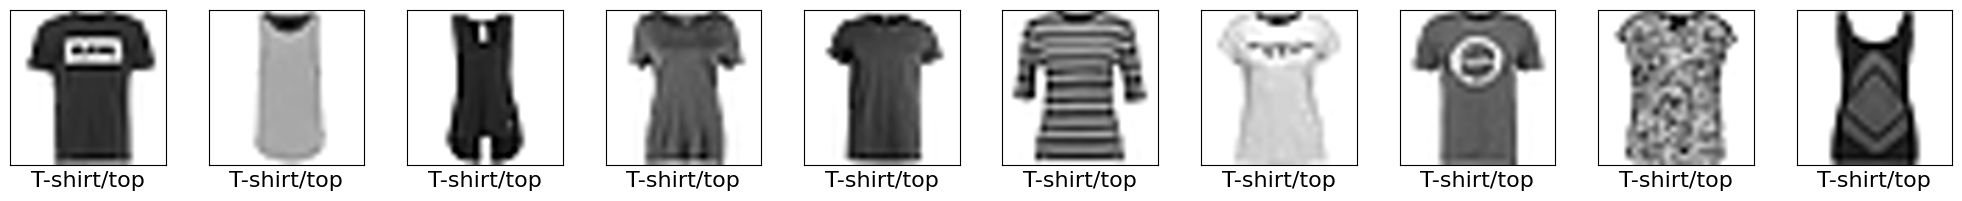

Images of Trouser


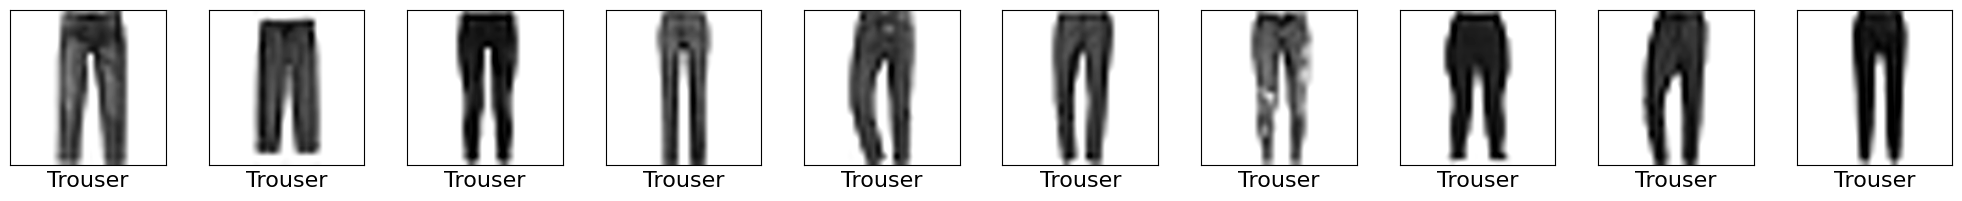

Images of Pullover


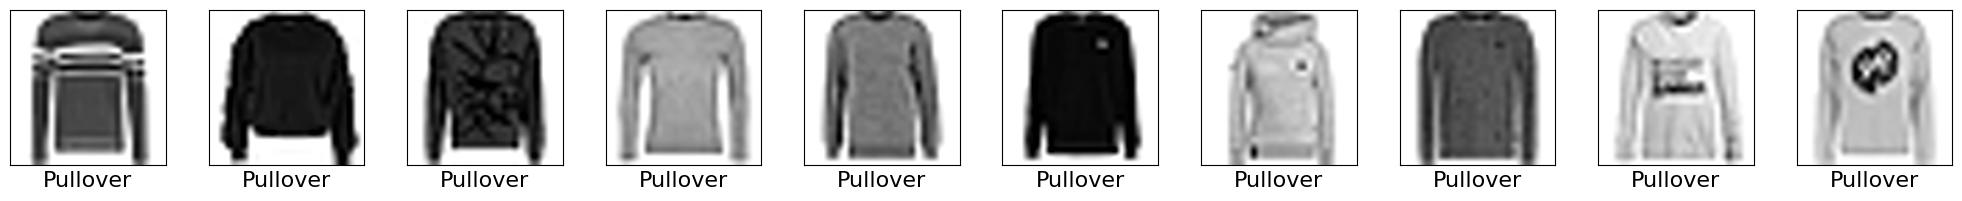

Images of Dress


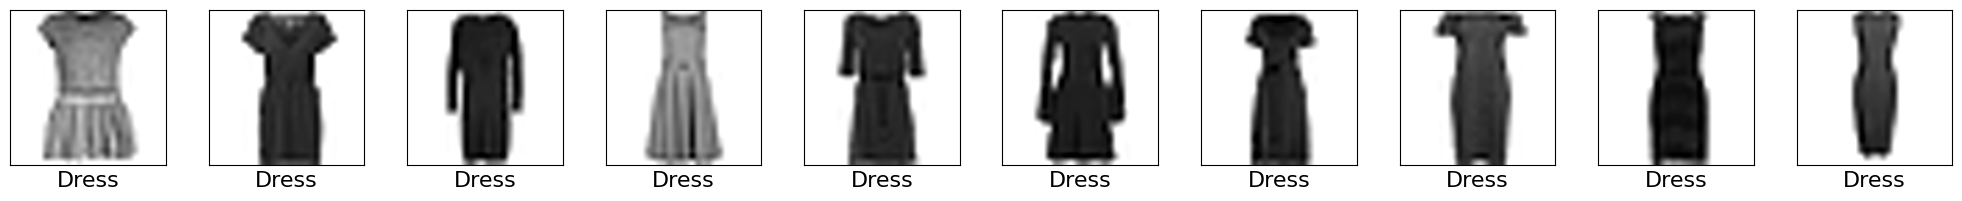

Images of Coat


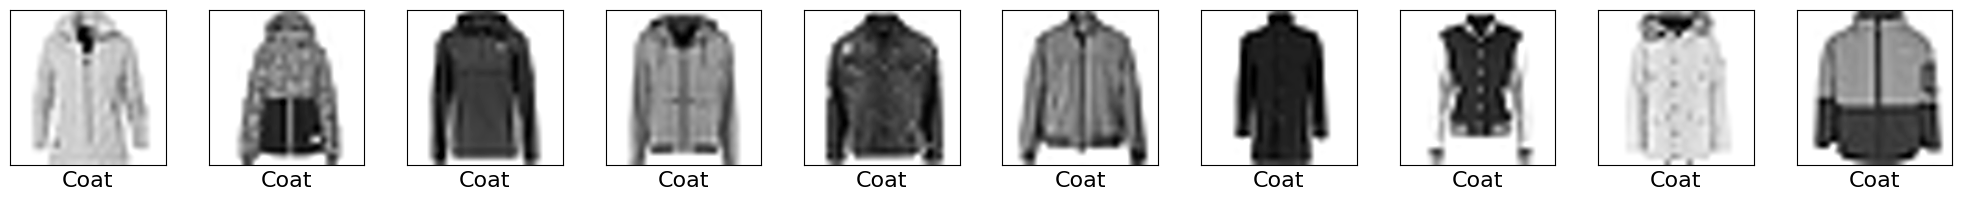

Images of Sandal


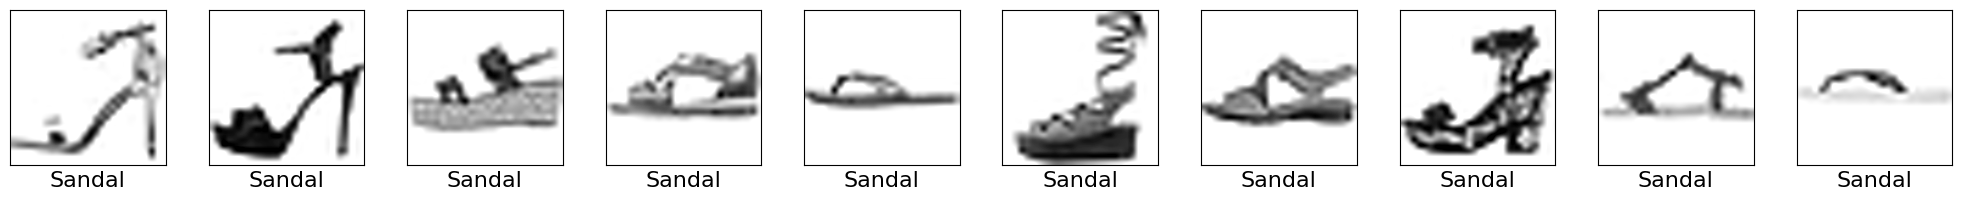

Images of Shirt


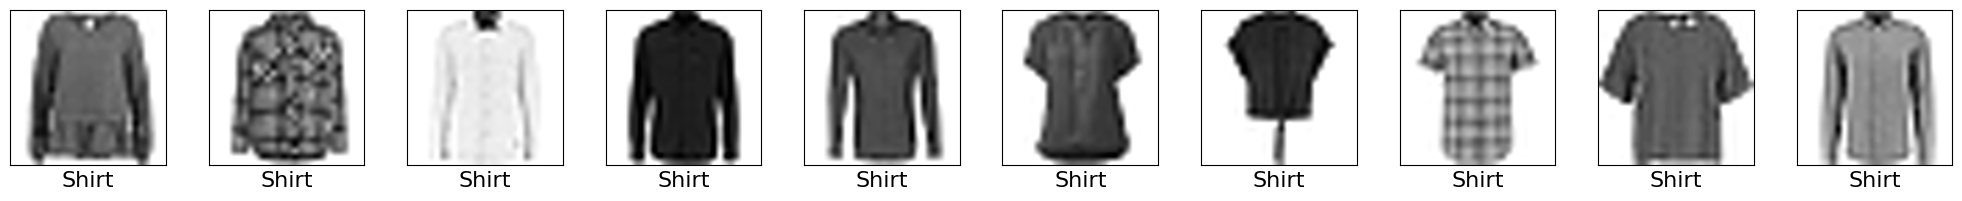

Images of Sneaker


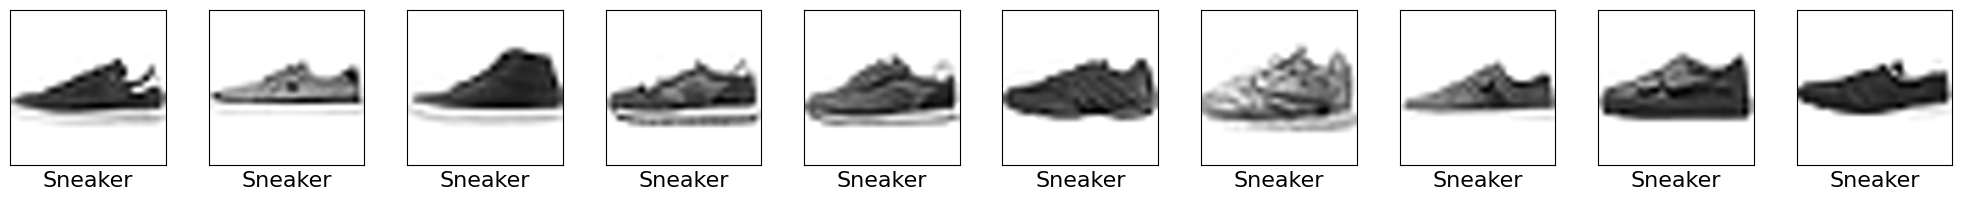

Images of Bag


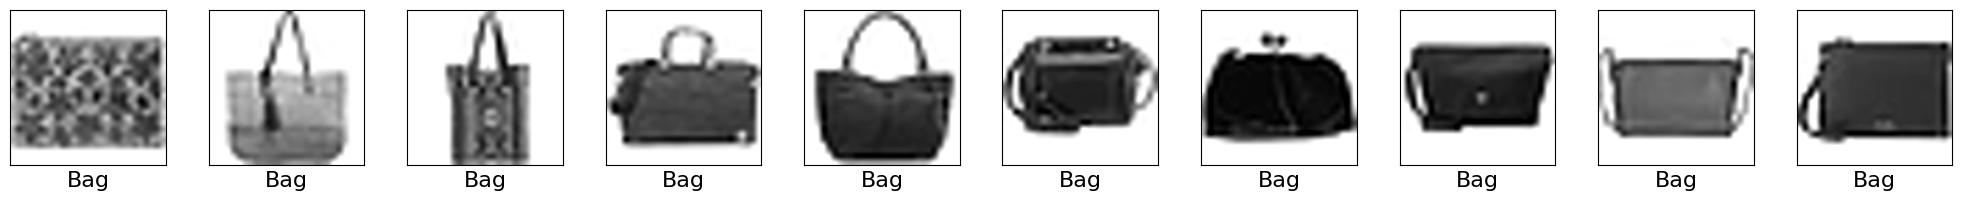

Images of Ankle boot


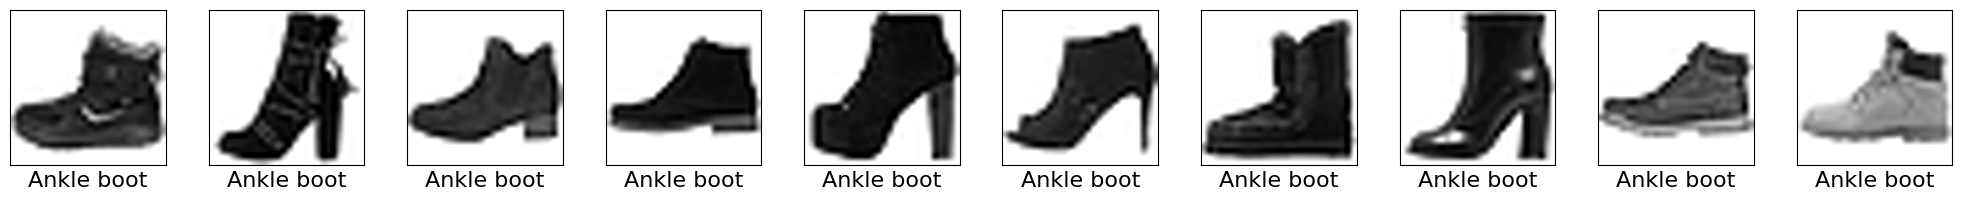

In [ ]:
for i in range(len(ITEMS)):
    print(f'Images of {ITEMS[i]}')
    idx = np.where(y_train == i)[0][:10]
    images = [x_train[j] for j in idx]
    displayImages(images, [ITEMS[y_train[j]] for j in idx], 10)


## 4\. Function to transform inputs
Images in convolution networks are represented by 3D arrays of dimensions $(width, height, depth)$, where $depth$ refers to the number of channels in the image. An *RGB* image has 3 channels: Red, Green, and Blue. A grayscale image has a single channel. We shall define a function to convert the 2D images into 3D tensors with the required shape. We shall also normalize the data by mapping gray scale values (0-255) to a number between 0 and 1.

In [ ]:
%%time
def Xform(x): # number of channels in a grayscale image = 1
    return x.reshape(-1, 28, 28, 1)/255.0
print(f'Downloaded x_test.shape: {x_test.shape}')
print(f'Transformed x_test.shape: {Xform(x_test).shape}')

Downloaded x_test.shape: (10000, 28, 28)
Transformed x_test.shape: (10000, 28, 28, 1)
CPU times: user 13.5 ms, sys: 12.6 ms, total: 26.1 ms
Wall time: 31.4 ms


## 5\. Create Convolution Neural Network Model [10 Points]
Create a Convolution Neural Network model with 4 convolution layers for predicting image classes. You should experiment with different hyper-parameters for the model.

Display your model summary.





In [3]:
# Import necessary libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
def create_cnn_model():
    model = Sequential()

    # 1st Conv Layer
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # 2nd Conv Layer
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # 3rd Conv Layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))

    # 4th Conv Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))

    # Flatten the output for the Dense layers
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # 10 classes for Fashion MNIST

    return model

# Create the model
cnn_model = create_cnn_model()

# Display model summary
cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,002,506 (7.64 MB)

 Trainable params: 2,002,506 (7.64 MB)

 Non-trainable params: 0 (0.00 B)

## 6\. Train model [10 Points]

Train the model over a number of epochs and in batches of specified sizes. Reserve 10% of the training examples for validation. You should aim for a validation accuracy of over $0.92$ by the last epoch.  

In [8]:
# Specify yoor code in this cell
# Load the Fashion MNIST dataset
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Define function to transform input images
def Xform(x):
    return x.reshape(-1, 28, 28, 1) / 255.0  # Normalize pixel values (0-255) to (0-1)

# Transform input data
x_train_transformed = Xform(x_train)
x_test_transformed = Xform(x_test)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## 7\. Plot history [5 Points]
Check for over-fitting by plotting training and validation accuracy over epochs.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.6326 - loss: 0.9949 - val_accuracy: 0.8563 - val_loss: 0.3864
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8579 - loss: 0.3989 - val_accuracy: 0.8875 - val_loss: 0.2996
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8832 - loss: 0.3281 - val_accuracy: 0.9075 - val_loss: 0.2577
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9000 - loss: 0.2795 - val_accuracy: 0.9120 - val_loss: 0.2520
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9098 - loss: 0.2532 - val_accuracy: 0.9155 - val_loss: 0.2410
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9175 - loss: 0.2337 - val_accuracy: 0.9157 - val_loss: 0.2265
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9227 - loss: 0.2141 - val_accuracy: 0.9207 - val_loss: 0.2197
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9300 - loss: 0.1947 - val_acc

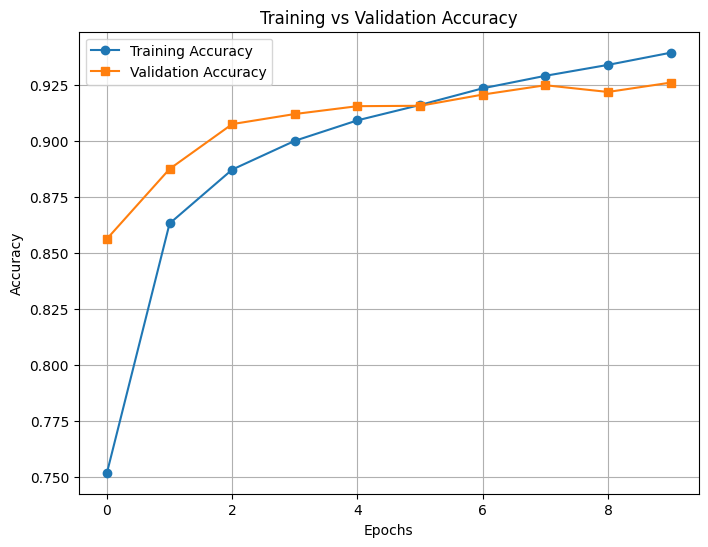

In [15]:
# Import necessary libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import keras

# Define the CNN model
def create_cnn_model():
    model = Sequential()

    # 1st Conv Layer
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # 2nd Conv Layer
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # 3rd Conv Layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))

    # 4th Conv Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))

    # Flatten the output for the Dense layers
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # 10 classes for Fashion MNIST

    return model

# Create the model
cnn_model = create_cnn_model()

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Define function to transform input images
def Xform(x):
    return x.reshape(-1, 28, 28, 1) / 255.0  # Normalize pixel values (0-255) to (0-1)

# Transform input data
x_train_transformed = Xform(x_train)
x_test_transformed = Xform(x_test)

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model and save the history
history = cnn_model.fit(x_train_transformed, y_train, epochs=10, batch_size=256, validation_split=0.1)

# Function to plot training & validation accuracy
def plot_history(history):
    plt.figure(figsize=(8, 6))

    # Plot accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot
plot_history(history)

**8. Predict classes for test images [5 Points]**

In [16]:
## enter your code in this cell
import numpy as np

# Predict class probabilities for test set
y_pred_probabilities = cnn_model.predict(x_test_transformed)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

# Print some sample predictions
print("Sample Predictions:")
for i in range(10):  # Show first 10 predictions
    print(f"Test Image {i+1}: Predicted = {y_pred_classes[i]}, Actual = {y_test[i]}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Sample Predictions:
Test Image 1: Predicted = 9, Actual = 9
Test Image 2: Predicted = 2, Actual = 2
Test Image 3: Predicted = 1, Actual = 1
Test Image 4: Predicted = 1, Actual = 1
Test Image 5: Predicted = 6, Actual = 6
Test Image 6: Predicted = 1, Actual = 1
Test Image 7: Predicted = 4, Actual = 4
Test Image 8: Predicted = 6, Actual = 6
Test Image 9: Predicted = 5, Actual = 5
Test Image 10: Predicted = 7, Actual = 7


## 9\. Display classification report for test samples [5 Points]
Metrics should be rounded to 4 decimal places

In [17]:
# enter your code in this cell
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_classes, digits=4)

# Print the classification report
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

           0     0.8869    0.8630    0.8748      1000
           1     0.9930    0.9860    0.9895      1000
           2     0.8650    0.8970    0.8807      1000
           3     0.9200    0.9320    0.9260      1000
           4     0.8527    0.8860    0.8691      1000
           5     0.9870    0.9850    0.9860      1000
           6     0.7953    0.7500    0.7720      1000
           7     0.9532    0.9780    0.9654      1000
           8     0.9880    0.9840    0.9860      1000
           9     0.9796    0.9620    0.9707      1000

    accuracy                         0.9223     10000
   macro avg     0.9221    0.9223    0.9220     10000
weighted avg     0.9221    0.9223    0.9220     10000



## 10\. Display confusion matrix for test samples [5 Points]

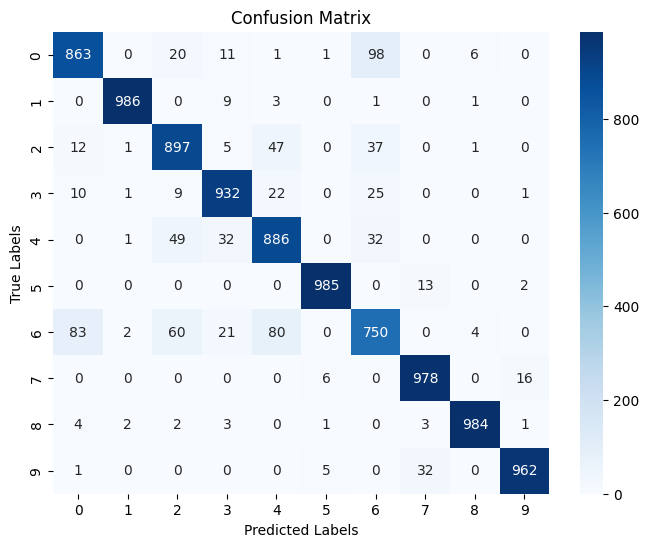

In [18]:
# enter your code in this cell
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
